#  第三讲 随机网络实践二

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy import stats

### 实验环境：
### Python版本==3.9.16, networkx==3.0, matplotlib==3.6.3, numpy==1.24.2, scipy==1.10.1.0, pandas==1.5.3, decimal=1.70,  pygraphviz==1.9, igraph==0.10.4

## 3. ER随机网络的结构特性

### 编程实践：绘制不同规模随机网络的度分布

In [3]:
# 定义求度分布的函数
def get_pdf(G, kmin, kmax):
    k = list(range(kmin, kmax+1))  # 获取所有可能的度值
    N = len(G.nodes())
    
    Pk = []
    for ki in k:
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1 

        Pk.append(c/N)     
    
    return k, Pk

In [4]:
samples = 100  # 统计平均
N = [100,1000]
# 为了便于统计平均，指定区间[20,80]
kmin, kmax, avk = 20, 80, 50
s1 = np.zeros(kmax-kmin+1)
s2 = np.zeros(kmax-kmin+1)
for i in range(samples):
    ER1 = nx.gnp_random_graph(N[0], avk/N[0])
    x1, y1 = get_pdf(ER1, kmin, kmax)
    ER2 = nx.gnp_random_graph(N[1], avk/N[1])
    x2, y2 = get_pdf(ER2, kmin, kmax)
    
    s1 += np.array(y1)
    s2 += np.array(y2)

    
# 计算二项分布理论值
n = 100
p = 0.5
k = np.arange(20,81)
pk_b = stats.binom.pmf(k,n,p)

# 计算泊松分布理论值
pk_p = [np.exp(-avk)*(avk**ki)/math.factorial(ki) for ki in range(kmin,kmax+1)]

(20.0, 80.0)

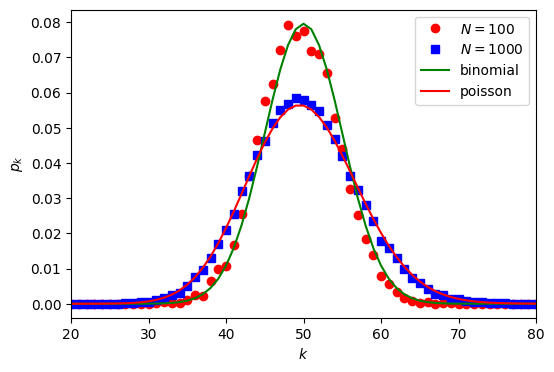

In [5]:
plt.figure(figsize=(6,4))
plt.plot(x1, s1/samples, 'ro', label='$N = 100$')
plt.plot(x2, s2/samples, 'bs', label='$N = 1000$')
plt.plot(x2, pk_b, 'g-', label='binomial')
plt.plot(x2, pk_p, 'r-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([20,80])

### 编程实践：测量/绘制真实网络的度分布

In [6]:
import pandas as pd
from decimal import Decimal   # python自带，不用自己安装

In [7]:
# 加载三个真实数据集
# 1. internet网络
df1 = pd.read_csv("router_internet.csv")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())
# 2. 科学合作网络
df2 = pd.read_csv("citation.csv")
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using = nx.Graph())
# 3. 蛋白质交互网络
df3 = pd.read_csv("protein_interaction.csv")
G3 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using = nx.Graph())
print(len(G1.nodes()),len(G2.nodes()),len(G3.nodes()))

192244 23133 2018


In [8]:
deg1 = [G1.degree(i) for i in G1.nodes()]
kmin1, kmax1 = min(deg1), max(deg1)

deg2 = [G2.degree(i) for i in G2.nodes()]
kmin2, kmax2 = min(deg2), max(deg2)

deg3 = [G3.degree(i) for i in G3.nodes()]
kmin3, kmax3 = min(deg3), max(deg3)

In [9]:
# 耐心等待，这三行程序比较耗时
k1, Pk1 = get_pdf(G1, kmin1, kmax1)
k2, Pk2 = get_pdf(G2, kmin2, kmax2)
k3, Pk3 = get_pdf(G3, kmin3, kmax3)

KeyboardInterrupt: 

In [11]:
# 绘制度分布
avk1 = sum(deg1)/len(G1.nodes())
avk2 = sum(deg2)/len(G2.nodes())
avk3 = sum(deg3)/len(G3.nodes())

# 使用以下方法可能会报错：OverflowError: int too large to convert to float
# pk_p1 = [np.exp(-avk1)*(avk1**ki)/math.factorial(ki) for ki in range(kmin1, kmax1+1)]
# pk_p2 = [np.exp(-avk2)*(avk2**ki)/math.factorial(ki) for ki in range(kmin2, kmax2+1)]
# pk_p3 = [np.exp(-avk3)*(avk3**ki)/math.factorial(ki) for ki in range(kmin3, kmax3+1)]

# 计算每个网络平均度值，并以此绘制泊松分布
pk_p1 = [Decimal(np.exp(-avk1))*(Decimal(avk1)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin1, kmax1+1)]
pk_p2 = [Decimal(np.exp(-avk2))*(Decimal(avk2)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin2, kmax2+1)]
pk_p3 = [Decimal(np.exp(-avk3))*(Decimal(avk3)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin3, kmax3+1)]

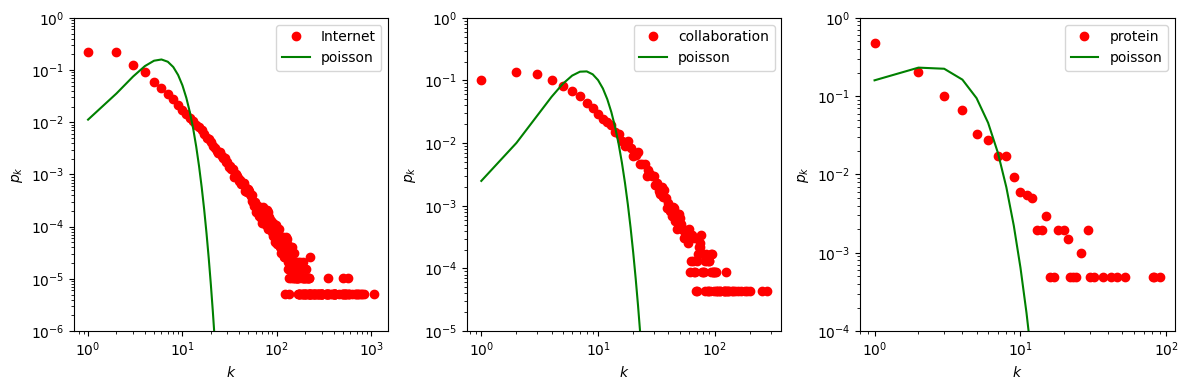

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(k1, Pk1, 'ro', label='Internet')
plt.plot(list(range(kmin1, kmax1+1)), pk_p1, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-6,1])
plt.xscale("log")
plt.yscale("log")

plt.subplot(132)
plt.plot(k2, Pk2, 'ro', label='collaboration')
plt.plot(list(range(kmin2, kmax2+1)), pk_p2, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-5,1])
plt.xscale("log")
plt.yscale("log")

plt.subplot(133)
plt.plot(k3, Pk3, 'ro', label='protein')
plt.plot(list(range(kmin3, kmax3+1)), pk_p3, 'g-', label='poisson')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1])
plt.xscale("log")
plt.yscale("log")

plt.tight_layout()

### 编程实践：计算ER随机网络的平均最短路径长度和平均集聚系数

networkx计算大型网络的平均最短路径长度比较耗时，为此，我们考虑使用igraph

In [10]:
import igraph as ig

In [11]:
# def cal_by_networkx(samples, N):
#     avl, clu = [], []
#     t_avl, t_clu = [], []
#     for n in N:
#         p = 10 / n
#         avl0 = 0
#         clu0 = 0
#         t_avl0 = 0
#         t_clu0 = 0
#         for i in range(samples):
#             Ger = nx.gnp_random_graph(n,p)
#             avk = sum([Ger.degree(j) for j in Ger.nodes()]) / n
#             # 理论近似值
#             t_avl0 += np.log(n) / np.log(avk)
#             t_clu0 += avk / n

#             # 模拟值
#             # 如果Ger是连通的
#             if nx.is_connected(Ger):
#                 avl0 += nx.average_shortest_path_length(Ger)
#             else: # 如果Ger是不连通的，用最大连通子图的平均距离代替整个网络的平均距离
#                 Gcc = sorted(nx.connected_components(Ger), key=len, reverse=True)
#                 # 得到图Ger的最大连通组件
#                 LCC = Ger.subgraph(Gcc[0])
#                 avl0 += nx.average_shortest_path_length(LCC)

#             clu0 += nx.average_clustering(Ger)
#         avl.append(avl0 / samples)
#         clu.append(clu0 / samples)
#         t_avl.append(t_avl0 / samples)
#         t_clu.append(t_clu0/samples)
#     return avl, clu, t_avl, t_clu



def cal_by_igraph(samples, N):
    avl, clu = [], []
    t_avl, t_clu = [], []
    for n in N:
        m = 5*n
        avl0 = 0
        clu0 = 0
        t_avl0 = 0
        t_clu0 = 0
        for i in range(samples):
            Ger = ig.Graph.Erdos_Renyi(n=n, m=m) 
            avk = sum(Ger.degree()) / n
            # 理论近似值
            t_avl0 += np.log(n) / np.log(avk)
            t_clu0 += avk / n

            # 模拟值
            avl0 += Ger.average_path_length()
            clu0 += Ger.transitivity_avglocal_undirected(mode='zero')

        avl.append(avl0 / samples)
        clu.append(clu0 / samples)
        t_avl.append(t_avl0 / samples)
        t_clu.append(t_clu0/samples)
    return avl, clu, t_avl, t_clu

In [12]:
# 耐心等待，计算这些指标比较耗时
samples = 10  # 为了使结果更加精确，通常需要将samples设置为较大的值.这里为了快速得到结果，可以取为1个样本
N = [100,200,300,500,700,1000,2000,5000]
# avl_0, clu_0, t_avl0, t_clu0 = cal_by_networkx(samples, N) # 速度较慢
avl_0, clu_0, t_avl0, t_clu0 = cal_by_igraph(samples, N)  

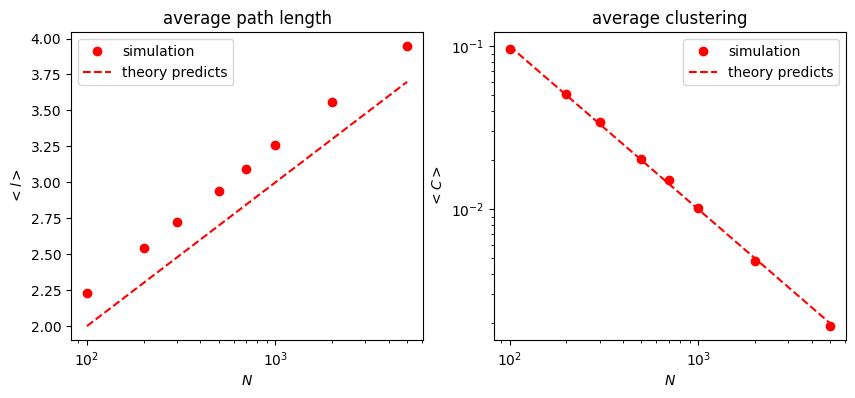

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(N, avl_0, 'ro', label='simulation')
plt.plot(N, t_avl0, 'r--', label='theory predicts')
plt.title("average path length")
plt.legend(loc=0)
plt.xlabel("$N$")
plt.ylabel("$<l>$")
plt.xscale("log")

plt.subplot(122)
plt.plot(N, clu_0, 'ro', label='simulation')
plt.plot(N, t_clu0, 'r--', label='theory predicts')
plt.title("average clustering")
plt.legend(loc=0)
plt.xlabel("$N$")
plt.ylabel("$<C>$")
plt.xscale("log")
plt.yscale("log")

### 编程实践：可视化ER随机网络的巨连通分量

In [19]:
# 以下代码搬运的是NetworkX官方示例：
# https://networkx.org/documentation/stable/auto_examples/graphviz_layout/plot_giant_component.html#sphx-glr-auto-examples-graphviz-layout-plot-giant-component-py

### 说明：1、先安装graphviz，下载地址：https://graphviz.org/download/
![graphviz](graphviz.png)
### 2、将Graphviz \ bin文件夹添加到您的用户或系统PATH
### 3、检查 ：打开命令提示符并执行twopi -V。您应该能够看到控制台上打印的Graphviz版本。
### 4、下载pygraphviz文件（.whl文件），如pygraphviz-1.9-cp39-cp39-win_amd64.whl，地址：https://www.lfd.uci.edu/~gohlke/pythonlibs/#pygraphviz
### 5、将pygraphviz文件放置python安装路径Lib下的site-packages文件夹，打开命令窗口进入这个目录，输入pip install pygraphviz-1.9-cp39-cp39-win_amd64.whl安装，至此安装完毕！（亲测有效）


### 安装参考链接：https://www.codingdict.com/questions/175408

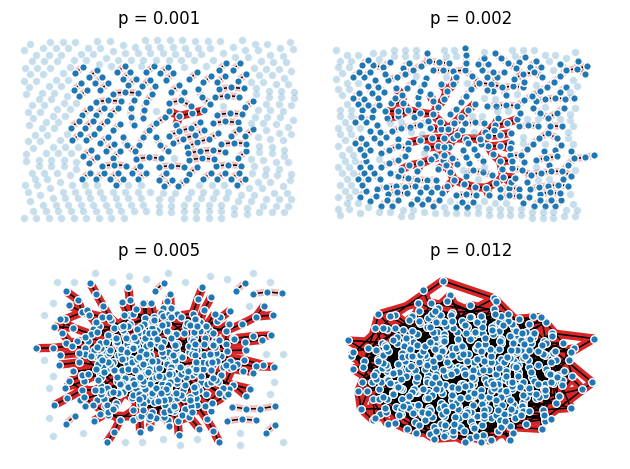

In [14]:
n = 500  # 500 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / n

# the following range of p values should be close to the threshold
pvals = [0.001, 0.002, 0.005, 0.012]


fig, axes = plt.subplots(2, 2)
for p, ax, seed in zip(pvals, axes.ravel(), range(len(pvals))):
    #### generate graph ####
    G = nx.binomial_graph(n, p, seed=seed)
    # identify connected/disconnected nodes
    connected = [n for n, d in G.degree() if d > 0]
    disconnected = list(set(G.nodes()) - set(connected))
    # identify largest connected component
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    #### draw graph ####
    pos = nx.nx_agraph.graphviz_layout(G)
    ax.set_title(f"p = {p:.3f}")
    # draw largest connected component
    options = {"ax": ax, "edge_color": "tab:red"}
    nx.draw_networkx_edges(G0, pos, width=6.0, **options)
    # draw other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.3, width=5.0, **options)
    # draw connected/disconnected nodes
    options = {"ax": ax, "node_size": 30, "edgecolors": "white"}
    nx.draw(G, pos, nodelist=connected, **options)
    nx.draw(G, pos, nodelist=disconnected, alpha=0.25, **options)
fig.tight_layout()
plt.show()

### 编程实践：计算ER随机网络的巨连通分量的相对大小

In [99]:
def get_largest_connected_component_networkx(n, avki, samples):
    s0 = 0
    for i in range(samples):
        m = int(n*avki/2)
        G = nx.gnm_random_graph(n, m)
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        # G0 = G.subgraph(Gcc[0])
        s0 += len(Gcc[0])/n
    
    return s0/samples


def get_largest_connected_component_igraph(n, avki, samples):
    s0 = 0
    for i in range(samples):
        m = int(n*avki/2)
        Ger = ig.Graph.Erdos_Renyi(n=n, m=m) 
        components = Ger.connected_components(mode='strong')
        s0 += len(components[0])/n
    
    return s0/samples

In [104]:
n, samples = 1000, 10
avk = np.linspace(0, 5, 51)

S = []
for avki in avk:
    sp = get_largest_connected_component_networkx(n, avki, samples)
    S.append(sp)

Text(0, 0.5, '$S$')

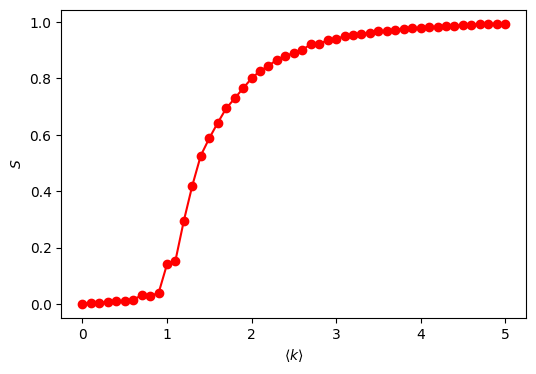

In [105]:
plt.figure(figsize=(6,4))
plt.plot(avk, S, 'ro-')
plt.xlabel(r"$\langle k \rangle$")
plt.ylabel("$S$")
# plt.savefig("S_vs_avk.png", dpi=600)

### 编程实践：计算ER随机网络的其他连通分量的平均大小

In [118]:
def get_mean_size_connected_component_networkx(n, avki, samples):
    s0 = 0
    for i in range(samples):
        m = int(n*avki/2)
        G = nx.gnm_random_graph(n, m)
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        mean_size = np.mean([len(gcci) for gcci in Gcc[1:]])

        s0 += mean_size
    
    return s0/samples

In [119]:
n, samples = 1000, 10
avk = np.linspace(0, 5, 51)

S = []
for avki in avk:
    sp = get_mean_size_connected_component_networkx(n, avki, samples)
    S.append(sp)

Text(0, 0.5, '$\\langle S \\rangle$')

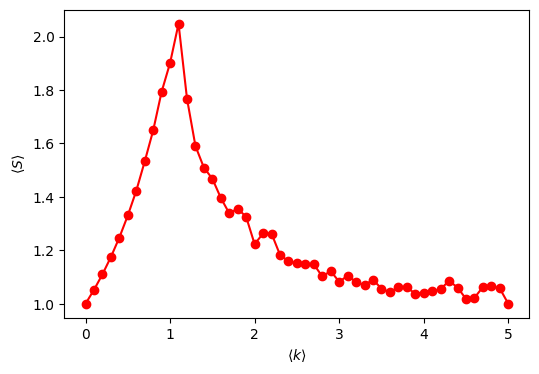

In [120]:
plt.figure(figsize=(6,4))
plt.plot(avk, S, 'ro-')
plt.xlabel(r"$\langle k \rangle$")
plt.ylabel(r"$\langle S \rangle$")

## 作业2"：全球航线网络与具有相同节点和连边数的ER随机网络的度分布

In [121]:
df = pd.DataFrame([
        ('World air transportation', '', 'openflights_world.edges.gz'),
    ],
    columns=['Name', 'Type', 'File'],
)

In [124]:
updates = []
for idx, row in df.iterrows():
    fname = row['File']
    print(idx)
    if 'graphml' in fname:
        G = nx.read_graphml(fname)
    else:
        graph_class = nx.DiGraph() if 'D' in row['Type'] else nx.Graph()
        data_spec = [('weight', float)] if 'W' in row['Type'] else False
        G = nx.read_edgelist(fname, create_using=graph_class, data=data_spec)
print(nx.number_of_nodes(G), nx.number_of_edges(G))

World air transportation
3179 18617


In [138]:
# 定义求度分布的函数：舍弃概率为零的那些值
def get_pdf2(G, kmin, kmax):
    k = list(range(kmin, kmax+1))  # 获取所有可能的度值
    N = len(G.nodes())
    
    new_k = []
    Pk = []
    for ki in k:
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1 
        if c > 0:
            new_k.append(ki)
            Pk.append(c/N)    
    Pck = [sum(Pk[i:]) for i in range(len(Pk))] # 累积度分布
    
    return new_k, Pk, Pck

In [139]:
GER = nx.gnm_random_graph(nx.number_of_nodes(G), nx.number_of_edges(G))

In [140]:
deg = [G.degree(i) for i in G.nodes()]
kmin, kmax = min(deg), max(deg)


deg2 = [GER.degree(i) for i in GER.nodes()]
kmin2, kmax2 = min(deg2), max(deg2)


k, Pk, Pck = get_pdf2(G, kmin, kmax)
k2, Pk2, Pck2 = get_pdf2(GER, kmin2, kmax2)

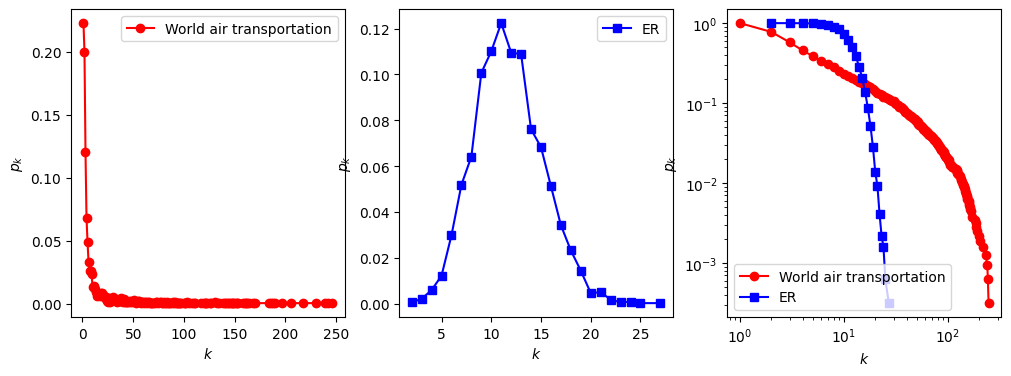

In [141]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(k, Pk, 'ro-', label='World air transportation')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")


plt.subplot(132)
plt.plot(k2, Pk2, 'bs-', label='ER')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")


plt.subplot(133)
plt.plot(k, Pck, 'ro-', label='World air transportation')
plt.plot(k2, Pck2, 'bs-', label='ER')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")